# LeNet Architecture on MNIST dataset

We can consider the LeNet architecture a milestone for the Artificial Intelligence field. Proposed in 1998, this model was capable to predict digits between 0 and 9, all of them wrote by hand, giving a high accuracy. This model exposed the efficacy of convolution layers. In this notebook, we train the LeNet model on the MNIST (original) dataset (28x28).

The LeNet model is a part of the compvis module, inside the sub-module cnns. To build the model, we consider the original paper, [found here](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=726791&casa_token=iU0-Vs9DJbQAAAAA:rNRwxCy_3d79qbR0L4iEDLKbRAoyIwtdCGe7OY6gbEqDfocp3XeZAy20ceZwaRmy5XF6ZPqEwA&tag=1). 

In [1]:
from compvis.ann.cnns import LeNet # compvis module
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

## Loading and preprocessing the dataset

In [2]:
dataset = fetch_openml('mnist_784', version=1, as_frame = False) # to load from scikit learn

In [3]:
data = dataset.data # to define the dataset

**Verifying the channel** 

In [4]:
if K.image_data_format() == "channel_first":
    data = data.reshape(data.shape[0], 1, 28, 28)
    print("you're using cheannel first")
else:
    data = data.reshape(data.shape[0], 28, 28, 1)
    print("you're using channel last")

you're using channel last


**Splitting the dataset into train and test set** 

We normalize the X variable into values between $0$ and $1$.

In [5]:
(X_train, X_test, y_train, y_test) = train_test_split(data / 255.,
                                                     dataset.target.astype("int"),
                                                     test_size = 0.25,
                                                     random_state = 42)

**Ecoding the target**

In [6]:
le = LabelBinarizer()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

## Building the model

**Defining the learning rate for the Stochastic Gradient Descent, the regularization method chosen for this task**

In [7]:
opt = SGD(lr = 0.01)

**Building, compiling and traning the LeNet model with compvis class**

The MNIST dataset used here has dimension of $(28, 28)$ that corresponds to our width and height, as the figures are on size scale, we consider $1$ channel and $10$ classes.

In [8]:
model = LeNet.build(width = 28, height = 28, depth = 1, classes = 10) # creating the model

In [9]:
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics=["accuracy"])

In [10]:
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=20, verbose=1)

Train on 52500 samples, validate on 17500 samples
Epoch 1/20
52500/52500 [==============================] - 4s 83us/sample - loss: 1.1637 - accuracy: 0.6769 - val_loss: 0.4513 - val_accuracy: 0.8524
Epoch 2/20
52500/52500 [==============================] - 3s 58us/sample - loss: 0.2880 - accuracy: 0.9131 - val_loss: 0.3274 - val_accuracy: 0.8951
Epoch 3/20
52500/52500 [==============================] - 3s 57us/sample - loss: 0.2034 - accuracy: 0.9396 - val_loss: 0.2021 - val_accuracy: 0.9398
Epoch 4/20
52500/52500 [==============================] - 3s 57us/sample - loss: 0.1592 - accuracy: 0.9522 - val_loss: 0.2008 - val_accuracy: 0.9365
Epoch 5/20
52500/52500 [==============================] - 3s 56us/sample - loss: 0.1295 - accuracy: 0.9620 - val_loss: 0.1345 - val_accuracy: 0.9609
Epoch 6/20
52500/52500 [==============================] - 3s 56us/sample - loss: 0.1104 - accuracy: 0.9676 - val_loss: 0.1096 - val_accuracy: 0.9675
Epoch 7/20
52500/52500 [==============================] 

**Predicting and evaluating the model.**

In [11]:
predictions = model.predict(X_test, batch_size=128)

In [12]:
cr = classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1),
                           target_names=[str(x) for x in le.classes_])
# We grab the target making the list from the attribute le.classes_

In [13]:
print(cr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1714
           1       0.99      0.99      0.99      1977
           2       0.98      0.98      0.98      1761
           3       0.98      0.98      0.98      1806
           4       0.98      0.99      0.98      1587
           5       0.99      0.98      0.98      1607
           6       0.99      0.99      0.99      1761
           7       0.99      0.97      0.98      1878
           8       0.98      0.97      0.98      1657
           9       0.96      0.97      0.97      1752

    accuracy                           0.98     17500
   macro avg       0.98      0.98      0.98     17500
weighted avg       0.98      0.98      0.98     17500



**Visualizing the metrics**

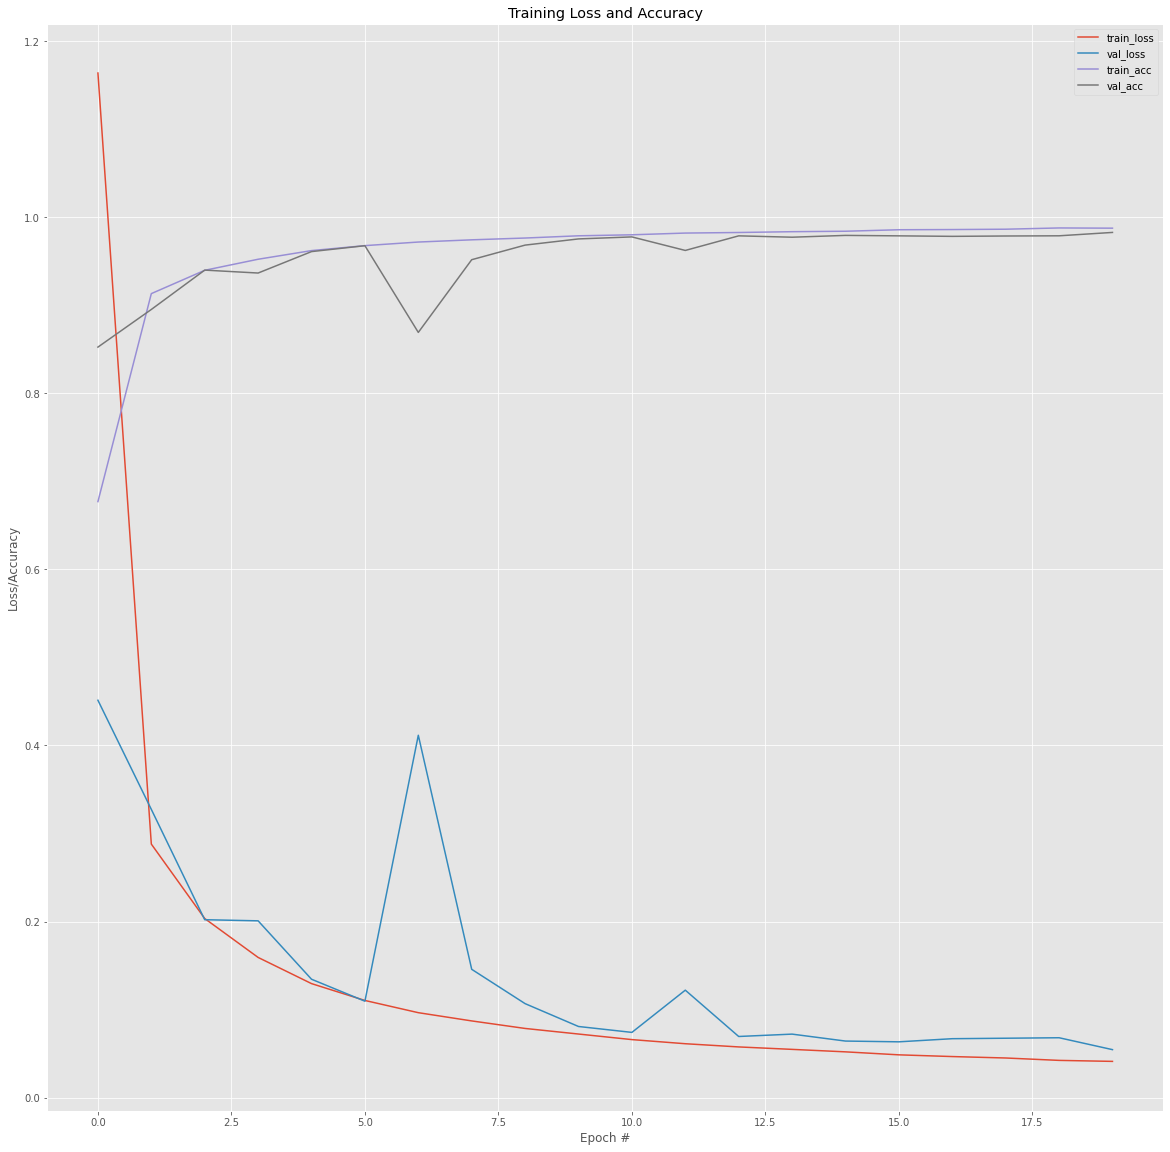

In [14]:
plt.style.use("ggplot")
plt.figure(figsize=(20,20))
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## Conclusions

The plot demonstrates the power of this architecture. With a final accuracy of $98\%$, but the most interesting is the accuracy of the validation set, the curve is near to the training test, demonstrating no over-fitting situation. We most also remember that MNIST is a toy dataset. The real tasks on computer vision demands more efforts and image preprocessing, but here is a good exercise to understand how a CNN works.